### Imports

In [99]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix


## Data Understanding

In [100]:
# Load the dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [101]:
# Print the first five columns in the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [102]:
# Find out the names of columns (features) in the dataframe
column_names_list = df.columns.tolist()
column_names_list

['state',
 'account length',
 'area code',
 'phone number',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls',
 'churn']

In [103]:
# Check for column data types
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [104]:
# Check for the shape of the dataframe
df.shape

(3333, 21)

In [105]:
# Summary of statistics in the dataframe
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [106]:
# Check for duplicates
df.duplicated().sum()

0

In [107]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [108]:
# Drop the phone number column as we won`t require it in our analysis
df = df.drop("phone number", axis=1, errors="ignore")
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Summary of the predictor features in the dataset

state: the state the customer lives in

account length: the number of days the customerr has had an account with SyriaTel

area code: the area code of the customer

international plan: yes if a customer has an international plan, otherwise no

voice mail plan: yes if a customer has a voice mail plan, otherwise no

number of vmail messages: the number of voicemails the customer has sent

total day minutes: total number of minutes the customer has been in calls during the day

total day calls: total number of calls the customer has done during the day

total day charge: the total cost of calls the customer was charged by the teleco. during the day

total eve minutes: total number of minutes the customer has been in calls during the evening

total eve calls: total number of calls customer has made in the evening

total eve charge: total cost of calls the customer was charged by the teleco. during evening hours

total night minutes: total number of minutes the customer has been in calls during the night

total night calls: total number of calls the customer has made during the night

total night charge: total cost of night calls the customer was charged by the teleco. during the night

total intl minutes: total number of minutes the customer has been on international calls

total intl calls: total number of international calls the customer has done

total intl charge: total cost of international calss the customer was charged by the teleco.

customer service calls: number of calsss a customer has made to customer service


## Exploratory Data Analysis

In [109]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Handling Numeric Features

In [110]:
numerical_columns = df.select_dtypes(include=['Int64', 'Float64']).columns
numerical_columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

### Check for missing values

In [144]:
df[numerical_columns].isnull().sum()

account length            0
area code                 0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

##### No missing values were found to be present in the numerical features


### Check for outliers in the numerical columns

In [111]:
df[numerical_columns].describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [112]:
print(round(df[numerical_columns].describe()), 2)

       account length  area code  number vmail messages  total day minutes  \
count          3333.0     3333.0                 3333.0             3333.0   
mean            101.0      437.0                    8.0              180.0   
std              40.0       42.0                   14.0               54.0   
min               1.0      408.0                    0.0                0.0   
25%              74.0      408.0                    0.0              144.0   
50%             101.0      415.0                    0.0              179.0   
75%             127.0      510.0                   20.0              216.0   
max             243.0      510.0                   51.0              351.0   

       total day calls  total day charge  total eve minutes  total eve calls  \
count           3333.0            3333.0             3333.0           3333.0   
mean             100.0              31.0              201.0            100.0   
std               20.0               9.0               51

Text(0, 0.5, 'account length')

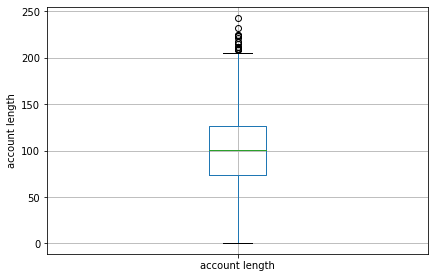

In [113]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column="account length")
fig.set_title("")
fig.set_ylabel("account length")



Text(0, 0.5, 'area code')

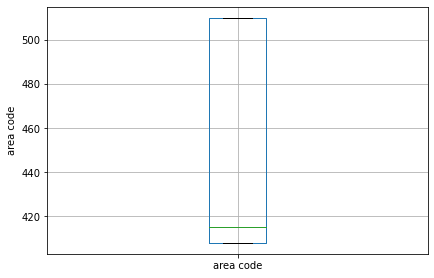

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
fig = df.boxplot(column="area code")
fig.set_title("")
fig.set_ylabel("area code")

Text(0, 0.5, 'number vmail messages')

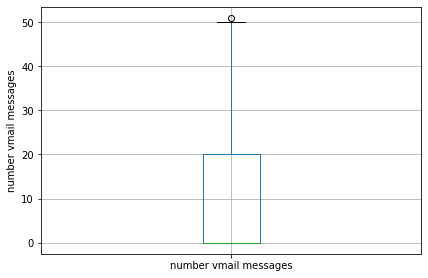

In [115]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3)
fig = df.boxplot(column="number vmail messages")
fig.set_title("")
fig.set_ylabel("number vmail messages")

Text(0, 0.5, 'total day minutes')

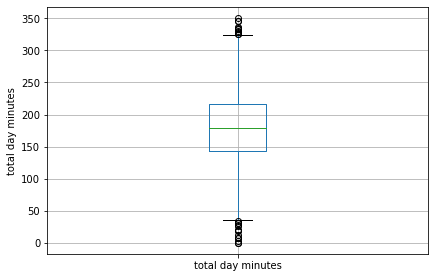

In [116]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total day minutes")
fig.set_title("")
fig.set_ylabel("total day minutes")

Text(0, 0.5, 'total day calls')

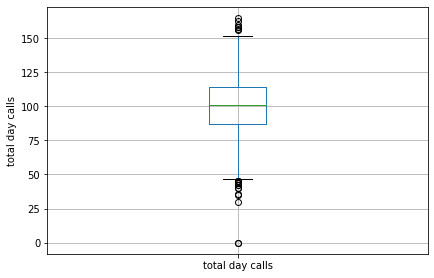

In [117]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total day calls")
fig.set_title("")
fig.set_ylabel("total day calls")

Text(0, 0.5, 'total day charge')

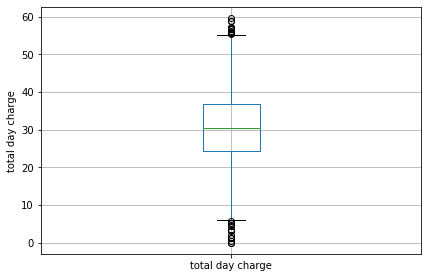

In [118]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total day charge")
fig.set_title("")
fig.set_ylabel("total day charge")

Text(0, 0.5, 'total eve minutes')

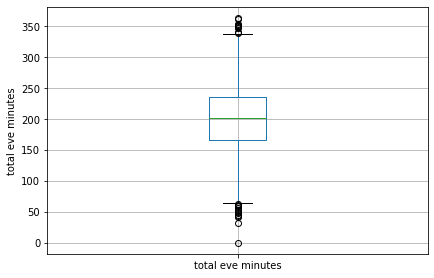

In [119]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total eve minutes")
fig.set_title("")
fig.set_ylabel("total eve minutes")

Text(0, 0.5, 'total eve calls')

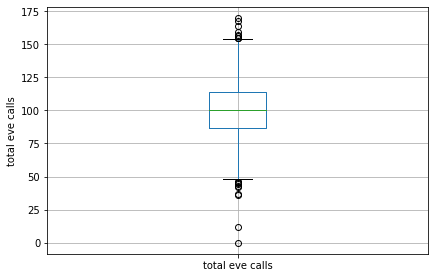

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total eve calls")
fig.set_title("")
fig.set_ylabel("total eve calls")

Text(0, 0.5, 'total eve charge')

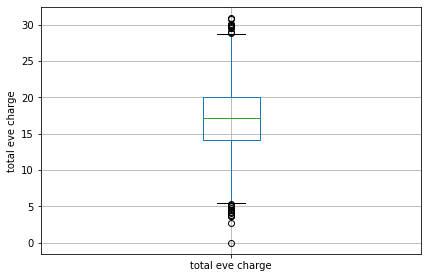

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total eve charge")
fig.set_title("")
fig.set_ylabel("total eve charge")

Text(0, 0.5, 'total night minutes')

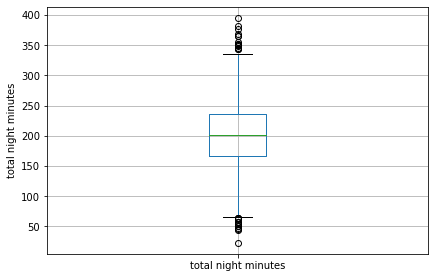

In [122]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total night minutes")
fig.set_title("")
fig.set_ylabel("total night minutes")

Text(0, 0.5, 'total night calls')

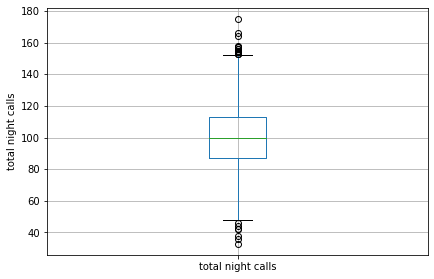

In [123]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total night calls")
fig.set_title("")
fig.set_ylabel("total night calls")

Text(0, 0.5, 'total night charge')

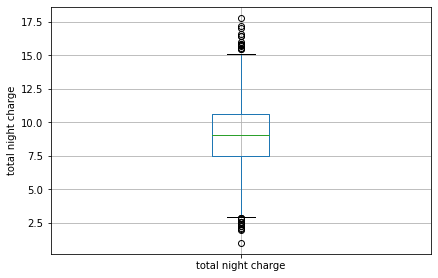

In [124]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total night charge")
fig.set_title("")
fig.set_ylabel("total night charge")

Text(0, 0.5, 'total intl minutes')

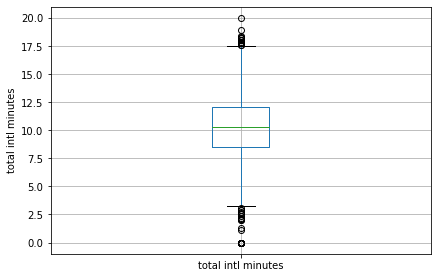

In [125]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total intl minutes")
fig.set_title("")
fig.set_ylabel("total intl minutes")

Text(0, 0.5, 'total intl calls')

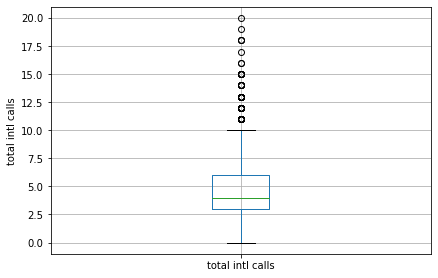

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total intl calls")
fig.set_title("")
fig.set_ylabel("total intl calls")

Text(0, 0.5, 'total intl charge')

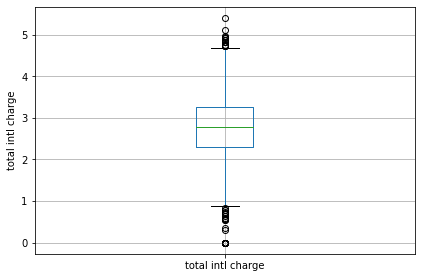

In [127]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="total intl charge")
fig.set_title("")
fig.set_ylabel("total intl charge")

Text(0, 0.5, 'customer service calls')

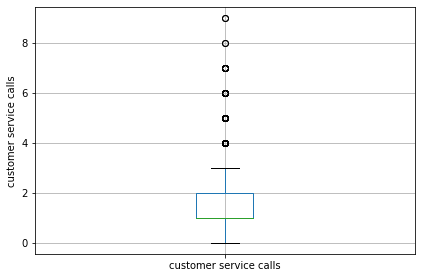

In [128]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
fig = df.boxplot(column="customer service calls")
fig.set_title("")
fig.set_ylabel("customer service calls")

##### Ouliers were found to be present in all columns bar the area code variable

### Handling Categorical Features

In [129]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

In [130]:
df[categorical_columns].head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


### Summary of categorical variables
Categorical variables include: state, international plan and voice mail plan

In [131]:
# check for missing values in the categorical columns
df[categorical_columns].isnull().sum()

state                 0
international plan    0
voice mail plan       0
dtype: int64

##### No missing values in the categorical columns

### Frequency counts of categorical variables

In [132]:
# View the frequency of categorical variables
for column in categorical_columns:
    print(df[column].value_counts())

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
no     3010
yes     323
Name: international plan, dtype: int64
no     2411
yes     922
Name: voice mail plan, dtype: int64


In [133]:
for var in categorical_columns:
    print(df[var].value_counts()/np.int64(len(df)))

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
WI    0.023402
OR    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
VT    0.021902
ID    0.021902
MI    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NJ    0.020402
NC    0.020402
NV    0.019802
WA    0.019802
CO    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ND    0.018602
NM    0.018602
ME    0.018602
NE    0.018302
DE    0.018302
OK    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64
no     0.90309
yes    0.09691
Name: international plan, dtype: float64
no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64


In [134]:
for var in categorical_columns:
    print(var, "contains", len(df[var].unique()), "labels")

state contains 51 labels
international plan contains 2 labels
voice mail plan contains 2 labels


### Explore state variable

In [135]:
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [136]:
df["state"].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MS     65
RI     65
MA     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [137]:
pd.get_dummies(df["state"]).head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore intl plan variable

In [138]:
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

In [139]:
df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [140]:
pd.get_dummies(df["international plan"]).head()

,no,yes
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


### Explore voicemail plan variable

In [141]:
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

In [142]:
df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [143]:
pd.get_dummies(df["voice mail plan"]).head()

,no,yes
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
